Machine Learning:
1. Observaciones etiquetadas
2. Un set de entrenamiento
3. Tener un set de prueba
4. Machine Learner: Aprendizaje supervisado.
5. Una vez entrenado, se usará como un modelo predictivo
6. Estadísticos

ML Supervisado:
Existe regresión y clasificación

Clasificación:
1. Retención de clientes
2. Diagnósticos
3. Clasificación de imágenes

Resumen: Módelos de regresión Lineal y regresión Logística.

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def estimate_b0_b1(x, y):
    n = np.size(x)
    #Sacamos los promedios de x e y
    m_x, m_y = np.mean(x), np.mean(y)

    #Calcular sumatoria de XY y mi sumatoria de XX
    sum_xy = np.sum((x-m_x)*(y-m_y))
    sum_xx = np.sum(x*(x-m_x))

    #Coeficientes de regresión
    b_1 = sum_xy/sum_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)  #print(f'Y = {b_1}X + {b_0}')

#Función de graficado
def plot_regresion(x, y, b):
    plt.scatter(x, y,  color = 'g', marker = 'o', s = 30)

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'b')

    #Etiquetado
    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')
    
    plt.show()

Y = 0.9X + 1.5


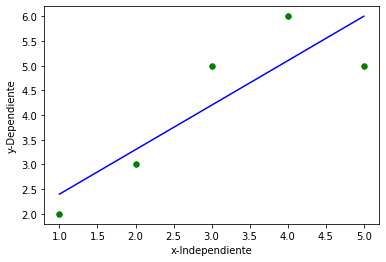

In [8]:
#Código Main
def main():
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 3, 5, 6, 5])

    #Obtenemos b1 y b2
    b = estimate_b0_b1(x, y)
    print(f'Y = {b[1]}X + {b[0]}')
    plot_regresion(x, y, b)

if __name__ == '__main__':
    main()


# Practica de **Regresión Lineal**

In [9]:
df = pd.read_csv('PRODUCCIONc.csv')

In [10]:
df.head()

,Anio,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,CAFE,"112,343.60","120,500.80",1.07,14.54,14.66
1,2007,BOLIVAR,CAFE,502.00,446.00,0.89,0.05,0.07
2,2007,BOYACA,CAFE,"11,374.50","9,683.10",0.85,1.17,1.48
3,2007,CALDAS,CAFE,"78,393.65","92,815.00",1.18,11.20,10.23
4,2007,CAQUETA,CAFE,"2,295.00","2,134.00",0.93,0.26,0.30


In [11]:
df.dtypes

Anio                           int64
Departamento                  object
Producto                      object
Area (ha)                     object
Produccion (ton)              object
Rendimiento (ha/ton)         float64
Produccion Nacional (ton)    float64
Area Nacional (ha)           float64
dtype: object

In [12]:
#Aquí limpié los datos a un tipo que Pandas reconociese

for i in range(266):
    df.loc[i, 'Area (ha)'] = str(df.loc[i, 'Area (ha)']).replace(',','')

df.head()

,Anio,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,CAFE,112343.60,"120,500.80",1.07,14.54,14.66
1,2007,BOLIVAR,CAFE,502.00,446.00,0.89,0.05,0.07
2,2007,BOYACA,CAFE,11374.50,"9,683.10",0.85,1.17,1.48
3,2007,CALDAS,CAFE,78393.65,"92,815.00",1.18,11.20,10.23
4,2007,CAQUETA,CAFE,2295.00,"2,134.00",0.93,0.26,0.30


In [13]:
#Aquí hago lo mismo para Producción

for i in range(266):
    df.loc[i, 'Produccion (ton)'] = str(df.loc[i, 'Produccion (ton)']).replace(',', '')

In [14]:
#Comprobamos que los datos estén limpios
df.head()

,Anio,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,CAFE,112343.60,120500.80,1.07,14.54,14.66
1,2007,BOLIVAR,CAFE,502.00,446.00,0.89,0.05,0.07
2,2007,BOYACA,CAFE,11374.50,9683.10,0.85,1.17,1.48
3,2007,CALDAS,CAFE,78393.65,92815.00,1.18,11.20,10.23
4,2007,CAQUETA,CAFE,2295.00,2134.00,0.93,0.26,0.30


In [15]:
#Se pasan a número y se comprueba que sean float64

df['Area (ha)'] = pd.to_numeric(df['Area (ha)'])
df['Produccion (ton)'] = pd.to_numeric(df['Produccion (ton)'])
df.dtypes

Anio                           int64
Departamento                  object
Producto                      object
Area (ha)                    float64
Produccion (ton)             float64
Rendimiento (ha/ton)         float64
Produccion Nacional (ton)    float64
Area Nacional (ha)           float64
dtype: object

In [16]:
df.groupby('Anio').count()

,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
Anio,,,,,,,
2007,22,22,22,22,22,22,22
2008,22,22,22,22,22,22,22
2009,22,22,22,22,22,22,22
2010,23,23,23,23,23,23,23
2011,23,23,23,23,23,23,23
2012,23,23,23,23,23,23,23
2013,22,22,22,22,22,22,22
2014,22,22,22,22,22,22,22
2015,22,22,22,22,22,22,22


In [17]:
df.groupby('Departamento').count()

,Anio,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
Departamento,,,,,,,
ANTIOQUIA,12,12,12,12,12,12,12
ARAUCA,2,2,2,2,2,2,2
BOLIVAR,12,12,12,12,12,12,12
BOYACA,12,12,12,12,12,12,12
CALDAS,12,12,12,12,12,12,12
CAQUETA,12,12,12,12,12,12,12
CASANARE,12,12,12,12,12,12,12
CAUCA,12,12,12,12,12,12,12
CESAR,12,12,12,12,12,12,12


<AxesSubplot:xlabel='Area (ha)'>

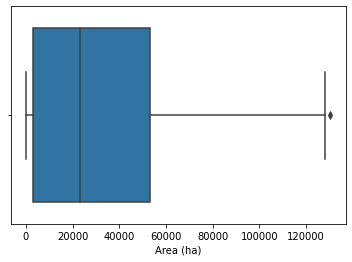

In [18]:
# Se hace un boxplot de cada una de las variables a ver que tal.
sns.boxplot(x = df['Area (ha)'])


<AxesSubplot:xlabel='Produccion (ton)'>

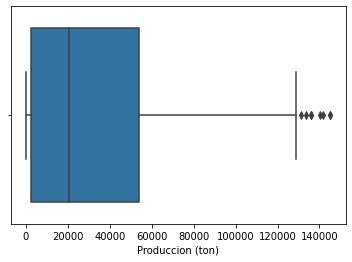

In [31]:
sns.boxplot(x = df['Produccion (ton)'], hue=df['Departamento'])

<AxesSubplot:xlabel='Produccion (ton)', ylabel='Count'>

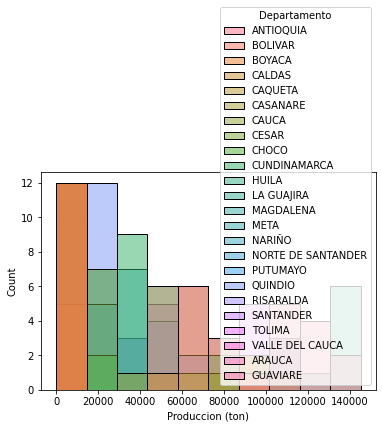

In [30]:
sns.histplot(x = df['Produccion (ton)'], hue=df['Departamento'])

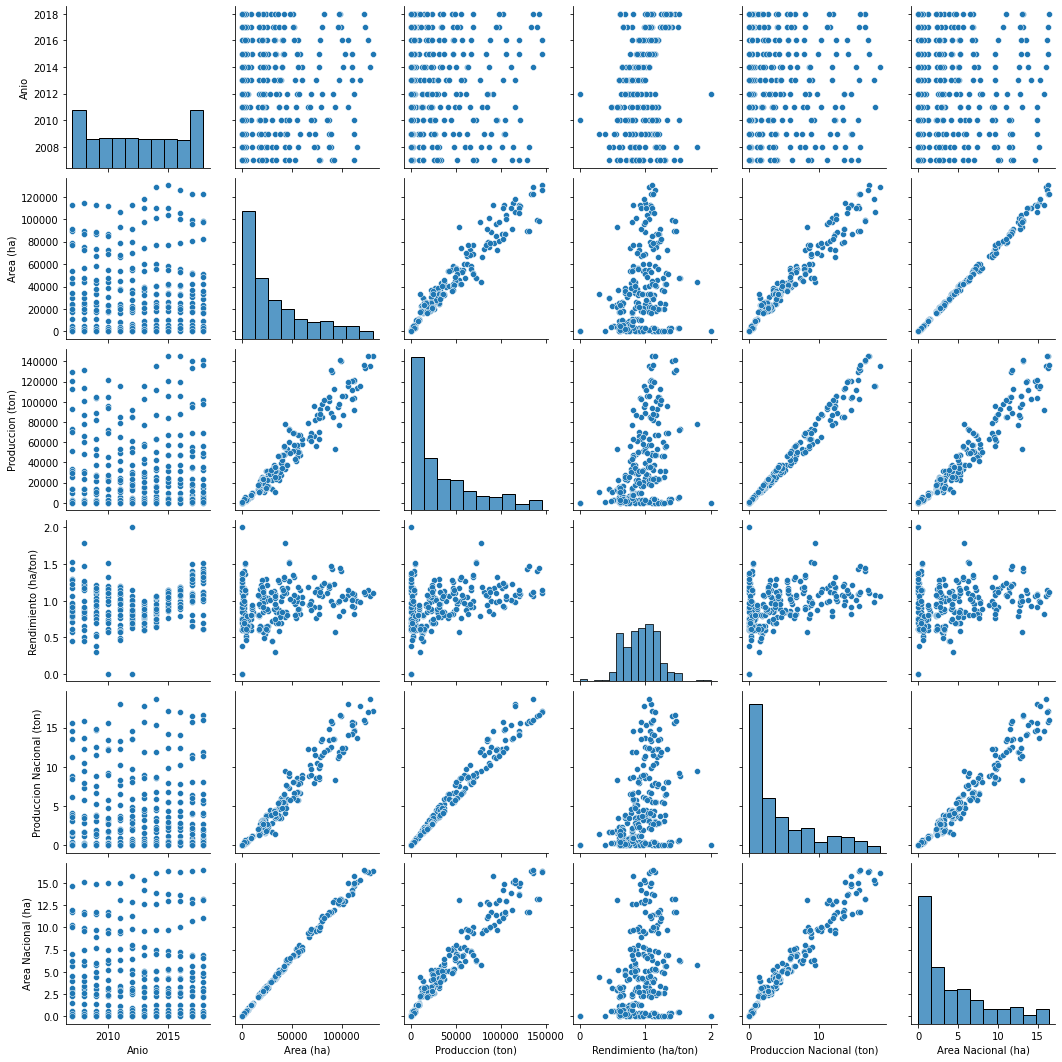

In [21]:
sns.pairplot(df)

In [24]:
df_cum_prod = df.groupby('Anio').sum('Produccion (Ton)')
df_cum_prod

,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
Anio,,,,,
2007,766476.77,828898.23,20.91,100.01,100.00
2008,758306.46,828585.59,21.62,100.00,99.99
2009,754651.30,708891.42,19.39,100.00,99.98
2010,744318.43,779234.51,20.84,100.01,100.00
2011,712387.40,640431.78,19.65,100.02,100.00
2012,710462.03,626771.34,19.75,99.99,100.00
2013,771799.98,652052.02,16.71,100.00,99.99
2014,795563.19,728400.01,18.09,100.00,100.00
2015,801081.63,850500.00,22.54,99.98,100.00


In [28]:
df_cum_depart = df.groupby('Departamento').sum('Produccion (ton)')
df_cum_depart = df_cum_depart[['Area (ha)', 'Produccion (ton)']]
df_cum_depart

,Area (ha),Produccion (ton)
Departamento,,
ANTIOQUIA,1302238.47,1402341.79
ARAUCA,10.00,12.00
BOLIVAR,10459.97,7826.04
BOYACA,116411.31,91966.55
CALDAS,756854.44,882982.19
CAQUETA,35267.97,37504.64
CASANARE,28312.40,23492.37
CAUCA,803149.40,774996.63
CESAR,289338.81,192643.73
